In [1]:
#carregando os dados
import pandas as pd

variants_train = pd.read_csv('data_files/training_variants', sep = ',')

In [2]:
#visualizando os dados
variants_train.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
#olhando os tipos dos dados
variants_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [4]:
#verificando se há algum registro faltante
variants_train.isnull().any().sum()

0

In [5]:
#verificando se há algum registro duplicado
variants_train.duplicated().any().sum()

0

In [6]:
#colacando em dicionario somente os valores unicos
unicos = {i:variants_train.iloc[:,i].unique() for i in range(len(variants_train.columns))}

In [7]:
unicos[1]

array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB',
       'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP',
       'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1',
       'LATS2', 'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C',
       'ERRFI1', 'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1',
       'ASXL2', 'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1',
       'SMAD2', 'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7',
       'CDK8', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1',
       'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4',
       'ABL1', 'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB',
       'RBM10', 'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2',
       'EWSR1', 'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4',
       'KLF4', 'RXRA', 'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA',
       'FANCC', 'MET', 'U2AF1', 'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA',
       'PIK3CB', 'PIM1

In [8]:
unicos[1].shape[0]

264

In [9]:
unicos[3]

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
unicos[2]

array(['Truncating Mutations', 'W802*', 'Q249E', ..., 'A122*', 'R80C',
       'K83E'], dtype=object)

In [11]:
unicos[2].shape[0]

2996

In [12]:
#dessa celula até a 28 minha intenção era investigar se o numero de genes e variações desses genes explicaria as variantes
#após a celula 28 há um texto explicando
gene_unicos = variants_train.groupby('Gene')['ID'].nunique()

In [13]:
gene_unicos

Gene
ABL1        26
ACVR1        3
AGO2         5
AKT1        28
AKT2        11
AKT3         4
ALK         69
APC          5
AR          20
ARAF         7
ARID1A       1
ARID1B       2
ARID2        2
ARID5B       1
ASXL1        1
ASXL2        1
ATM          6
ATR          1
ATRX         2
AURKA        3
AURKB        1
AXIN1        1
AXL          1
B2M          6
BAP1         9
BARD1        1
BCL10        2
BCL2         1
BCL2L11      2
BCOR         5
          ... 
SMARCB1      2
SMO         21
SOS1         6
SOX9         7
SPOP        20
SRC          2
SRSF2        1
STAG2        1
STAT3        8
STK11       13
TCF3         1
TCF7L2       1
TERT         8
TET1         3
TET2        14
TGFBR1       8
TGFBR2       5
TMPRSS2      6
TP53       163
TP53BP1      2
TSC1        20
TSC2        47
U2AF1        3
VEGFA        1
VHL         41
WHSC1        1
WHSC1L1      1
XPO1         2
XRCC2        2
YAP1         4
Name: ID, Length: 264, dtype: int64

In [14]:
genes_var_num = variants_train.groupby('Gene')['Variation'].nunique()

In [15]:
genes_var_num

Gene
ABL1        26
ACVR1        3
AGO2         5
AKT1        28
AKT2        11
AKT3         4
ALK         69
APC          5
AR          20
ARAF         7
ARID1A       1
ARID1B       2
ARID2        2
ARID5B       1
ASXL1        1
ASXL2        1
ATM          6
ATR          1
ATRX         2
AURKA        3
AURKB        1
AXIN1        1
AXL          1
B2M          6
BAP1         9
BARD1        1
BCL10        2
BCL2         1
BCL2L11      2
BCOR         5
          ... 
SMARCB1      2
SMO         21
SOS1         6
SOX9         7
SPOP        20
SRC          2
SRSF2        1
STAG2        1
STAT3        8
STK11       13
TCF3         1
TCF7L2       1
TERT         8
TET1         3
TET2        14
TGFBR1       8
TGFBR2       5
TMPRSS2      6
TP53       163
TP53BP1      2
TSC1        20
TSC2        47
U2AF1        3
VEGFA        1
VHL         41
WHSC1        1
WHSC1L1      1
XPO1         2
XRCC2        2
YAP1         4
Name: Variation, Length: 264, dtype: int64

In [16]:
classes_genes_var = variants_train.groupby('Class')['Gene','Variation'].nunique()

In [17]:
classes_genes_var

,Gene,Variation
Class,,
1,142,423
2,96,399
3,26,89
4,92,669
5,48,242
6,56,265
7,108,889
8,12,19
9,10,37


In [18]:
genes_maior = genes_var_num[genes_var_num > 90]

In [19]:
df_maiorgene = pd.DataFrame(genes_maior)

In [20]:
df_maiorgene = df_maiorgene.reset_index(level='Gene')

In [21]:
df_maiorgene

,Gene,Variation
0,BRAF,93
1,BRCA1,264
2,BRCA2,125
3,EGFR,141
4,KIT,99
5,PTEN,126
6,TP53,163


In [22]:
list_gene = ['BRAF','BRCA1','BRCA2','EGFR','KIT','PTEN','TP53']

In [23]:
gene_in_classes = variants_train[variants_train['Gene'].isin(list_gene)].groupby('Class')['Gene'].value_counts()

In [24]:
df_genein_classes = pd.DataFrame(gene_in_classes)

In [25]:
df_genein_classes.columns = ['Gene_num']

In [26]:
df_genein_classes = df_genein_classes.reset_index(level='Gene')

In [27]:
df_genein_classes = df_genein_classes.reset_index(level='Class')

In [28]:
df_genein_classes

,Class,Gene,Gene_num
0,1,TP53,83
1,1,BRCA1,60
2,1,BRCA2,18
3,1,PTEN,3
4,1,EGFR,1
5,2,EGFR,45
6,2,KIT,44
7,2,BRAF,31
8,2,TP53,3
9,3,BRCA1,15


As classes que apresentam maior numero de variações, terão em maior quantidade os genes que apresentam maior numero de variações? Os genes que possuem mior numero de variações estão no grafico da direita. As classes que apresentam maior numero de variações são a 7,4,2 respectivamente (olhar celula 17). No grafico da esquerda está justamente o numero de genes presentes do grafico da direita nas classes. Aparentemente não, pois eles estão presentes em boa quantidade em outras classes também, em algumas até mais do que nas listadas acima.

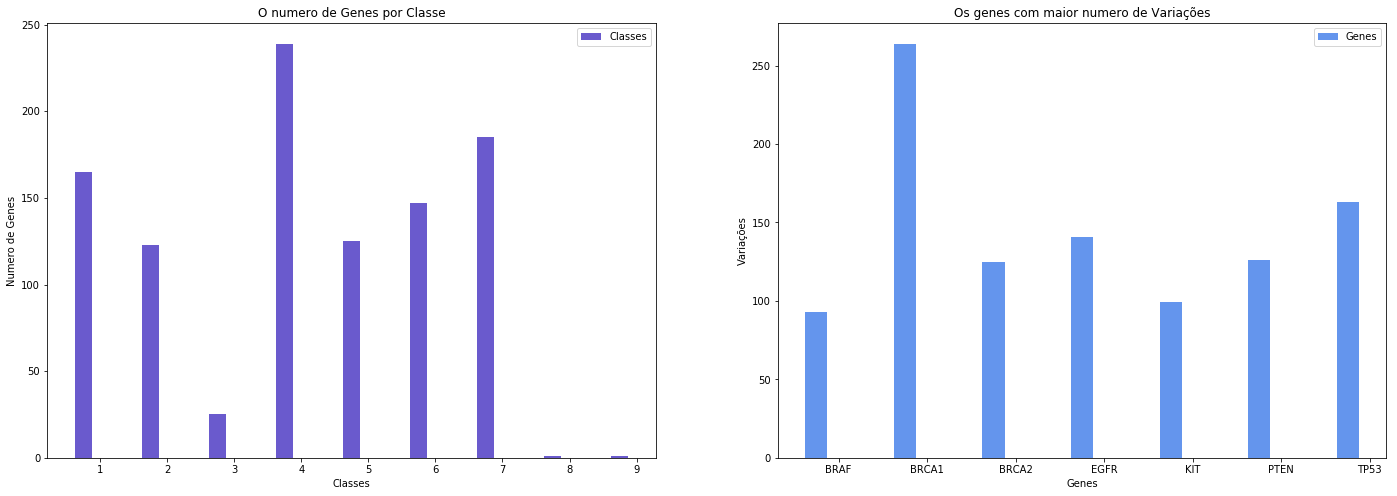

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
r1 = np.arange(len(unicos[3]))

plt.bar(r1, df_genein_classes.groupby('Class')['Gene_num'].sum(), color = '#6A5ACD', width=0.25, label = 'Classes')

plt.xticks([x + 0.25 for x in range(len(unicos[3]))], [1,2,3,4,5,6,7,8,9])
plt.xlabel('Classes')
plt.ylabel('Numero de Genes')
plt.title('O numero de Genes por Classe')
plt.legend()

plt.subplot(1,2,2)
r1 = np.arange(len(df_maiorgene.Gene))


plt.bar(r1, df_maiorgene['Variation'], color = '#6495ED', width=0.25, label = 'Genes')

plt.xticks([x + 0.25 for x in range(len(df_maiorgene.Gene))], ['BRAF','BRCA1','BRCA2','EGFR','KIT','PTEN','TP53'])
plt.xlabel('Genes')
plt.ylabel('Variações')
plt.title('Os genes com maior numero de Variações')
plt.legend()



plt.show()

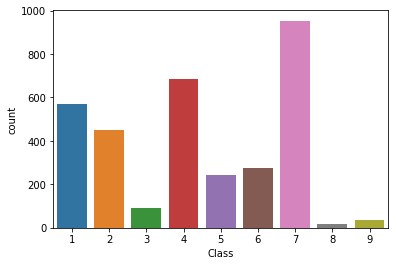

In [31]:
#olhando o balanceamento das classes
import seaborn as sns
sns.countplot(x='Class',data=variants_train)

In [32]:
#dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

x = variants_train.iloc[:,1:3].astype(str)
y = variants_train.iloc[:,3:]

y = np.ravel(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [33]:
#fazendo o ordinal encoder e label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
x_ordtrain = ordinal_encoder.fit_transform(x_train)
x_ordtest = ordinal_encoder.fit_transform(x_test)

label_encoder = LabelEncoder()

In [34]:
from keras.utils import np_utils
label_encoder.fit(y_train)
encoded_y = label_encoder.transform(y_train)
y_train = np_utils.to_categorical(encoded_y)

In [35]:
y_train.shape

(2822, 9)

In [36]:
y_test.shape

(499,)

In [37]:
x_ordtrain.shape

(2822, 2)

In [38]:
x_ordtest.shape

(499, 2)

In [39]:
#construindo o modelo e treinando-o com o ordinal encoder e com um range de batch size e epochs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


def cria_modelo_encodeord():
    modelo = Sequential()
    modelo.add(Dense(5, input_dim=2, activation='relu'))
    modelo.add(Dense(9, activation='sigmoid'))
    modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return modelo

modelo = KerasClassifier(build_fn=cria_modelo_encodeord, verbose=0)

batch_size = [20,40,60,80,100]
epochs = [10,50,100,150,200,250,300]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=modelo,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(x_ordtrain,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.329204 using {'batch_size': 60, 'epochs': 200}
0.186724 (0.045930) with: {'batch_size': 20, 'epochs': 10}
0.258328 (0.008290) with: {'batch_size': 20, 'epochs': 50}
0.313266 (0.025593) with: {'batch_size': 20, 'epochs': 100}
0.231060 (0.072462) with: {'batch_size': 20, 'epochs': 150}
0.237400 (0.043181) with: {'batch_size': 20, 'epochs': 200}
0.266119 (0.016969) with: {'batch_size': 20, 'epochs': 250}
0.294468 (0.008136) with: {'batch_size': 20, 'epochs': 300}
0.239205 (0.026528) with: {'batch_size': 40, 'epochs': 10}
0.270035 (0.042082) with: {'batch_size': 40, 'epochs': 50}
0.265068 (0.043690) with: {'batch_size': 40, 'epochs': 100}
0.267190 (0.023520) with: {'batch_size': 40, 'epochs': 150}
0.280298 (0.010475) with: {'batch_size': 40, 'epochs': 200}
0.286670 (0.012578) with: {'batch_size': 40, 'epochs': 250}
0.242041 (0.029209) with: {'batch_size': 40, 'epochs': 300}
0.176825 (0.016921) with: {'batch_size': 60, 'epochs': 10}
0.291627 (0.019889) with: {'batch_size': 60, 'epoc

In [40]:
#normalizando os dados 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_ordtrain)

x_ordtrainscaled = scaler.transform(x_ordtrain)


In [41]:
#treinando com os dados normalizados e ordinal encoder e apresentaram uma melhor acuracia
grid_result = grid.fit(x_ordtrainscaled,y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.361088 using {'batch_size': 20, 'epochs': 300}
0.300854 (0.007944) with: {'batch_size': 20, 'epochs': 10}
0.344433 (0.017980) with: {'batch_size': 20, 'epochs': 50}
0.354350 (0.017069) with: {'batch_size': 20, 'epochs': 100}
0.355419 (0.006804) with: {'batch_size': 20, 'epochs': 150}
0.357896 (0.012545) with: {'batch_size': 20, 'epochs': 200}
0.357899 (0.009624) with: {'batch_size': 20, 'epochs': 250}
0.361088 (0.010056) with: {'batch_size': 20, 'epochs': 300}
0.290217 (0.007616) with: {'batch_size': 40, 'epochs': 10}
0.360029 (0.014323) with: {'batch_size': 40, 'epochs': 50}
0.351166 (0.010959) with: {'batch_size': 40, 'epochs': 100}
0.360378 (0.011583) with: {'batch_size': 40, 'epochs': 150}
0.351518 (0.012883) with: {'batch_size': 40, 'epochs': 200}
0.357540 (0.015413) with: {'batch_size': 40, 'epochs': 250}
0.352582 (0.011171) with: {'batch_size': 40, 'epochs': 300}
0.256202 (0.028214) with: {'batch_size': 60, 'epochs': 10}
0.347982 (0.011045) with: {'batch_size': 60, 'epoc

In [45]:
#fazendo o balenceamento dos dados
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

oversample = SMOTE() 
x_train_ordsmoted, y_train_ordsmoted = oversample.fit_resample(x_ordtrainscaled,y_train)

In [44]:
y_train_ordsmoted

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [46]:
#testando o modelo com os dados normalizados, encoder e balanceados e houve uma piora
grid_result = grid.fit(x_train_ordsmoted, y_train_ordsmoted)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.039740 using {'batch_size': 40, 'epochs': 250}
0.007840 (0.005680) with: {'batch_size': 20, 'epochs': 10}
0.021492 (0.016088) with: {'batch_size': 20, 'epochs': 50}
0.016491 (0.012583) with: {'batch_size': 20, 'epochs': 100}
0.022438 (0.015703) with: {'batch_size': 20, 'epochs': 150}
0.035415 (0.019044) with: {'batch_size': 20, 'epochs': 200}
0.026494 (0.014289) with: {'batch_size': 20, 'epochs': 250}
0.038659 (0.013915) with: {'batch_size': 20, 'epochs': 300}
0.007705 (0.005511) with: {'batch_size': 40, 'epochs': 10}
0.019870 (0.019501) with: {'batch_size': 40, 'epochs': 50}
0.026899 (0.023808) with: {'batch_size': 40, 'epochs': 100}
0.021898 (0.009146) with: {'batch_size': 40, 'epochs': 150}
0.030278 (0.021069) with: {'batch_size': 40, 'epochs': 200}
0.039740 (0.017928) with: {'batch_size': 40, 'epochs': 250}
0.029738 (0.014570) with: {'batch_size': 40, 'epochs': 300}
0.008381 (0.007524) with: {'batch_size': 60, 'epochs': 10}
0.021627 (0.014812) with: {'batch_size': 60, 'epoc

In [47]:
#fazendo o one hot encoder para testar em novo modelo
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
x_hot = onehot_encoder.fit_transform(x)

In [48]:
x_hottrain,x_hottest,y_train,y_test = train_test_split(x_hot,y,test_size=0.15)

In [49]:
label_encoder.fit(y_train)
encoded_y = label_encoder.transform(y_train)
y_train = np_utils.to_categorical(encoded_y)

In [54]:
y_train.shape

(2822, 9)

In [50]:
x_hottrain.shape

(2822, 3260)

In [51]:
x_hottest.shape

(499, 3260)

In [52]:
#fazendo a redução de dimensionalidade
#eu testei com outro numeros de componentes, porem demorava muito
#por isso optei por 40 por ter um tempo razoavel de treino no meu computador
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

normalizer = Normalizer().fit(x_hottrain)
x_hottrainnormalized = normalizer.transform(x_hottrain)

pca = PCA(n_components=40)
pca_x = pca.fit_transform(x_hottrainnormalized)

In [73]:
#treinando o modelo com os dados redimensionados e one hot encode
#também testando range de batch size e epochs
def cria_modelo_encodehot():
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, activation='relu'))
    modelo.add(Dense(9, activation='sigmoid'))
    modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return modelo

modelo2 = KerasClassifier(build_fn=cria_modelo_encodehot, verbose=0)

batch_size = [20,40,60,80]
epochs = [50,100,200,300]
param_grid2 = dict(batch_size=batch_size,epochs=epochs)
grid2 = GridSearchCV(estimator=modelo2,param_grid=param_grid2,n_jobs=-1,cv=3)
grid_result2 = grid2.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score'] 
stds2 = grid_result2.cv_results_['std_test_score'] 
params2 = grid_result2.cv_results_['params'] 
for mean, std, param in zip(means2,stds2,params2):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.557052 using {'batch_size': 60, 'epochs': 300}
0.524807 (0.009672) with: {'batch_size': 20, 'epochs': 50}
0.537564 (0.013904) with: {'batch_size': 20, 'epochs': 100}
0.552091 (0.021313) with: {'batch_size': 20, 'epochs': 200}
0.551030 (0.020889) with: {'batch_size': 20, 'epochs': 300}
0.517011 (0.015481) with: {'batch_size': 40, 'epochs': 50}
0.528701 (0.015837) with: {'batch_size': 40, 'epochs': 100}
0.555988 (0.025193) with: {'batch_size': 40, 'epochs': 200}
0.551738 (0.020225) with: {'batch_size': 40, 'epochs': 300}
0.516654 (0.017398) with: {'batch_size': 60, 'epochs': 50}
0.534375 (0.016435) with: {'batch_size': 60, 'epochs': 100}
0.551030 (0.020043) with: {'batch_size': 60, 'epochs': 200}
0.557052 (0.026485) with: {'batch_size': 60, 'epochs': 300}
0.510630 (0.017499) with: {'batch_size': 80, 'epochs': 50}
0.526578 (0.013784) with: {'batch_size': 80, 'epochs': 100}
0.540043 (0.014353) with: {'batch_size': 80, 'epochs': 200}
0.555635 (0.023948) with: {'batch_size': 80, 'epo

In [55]:
x_train_hotsmoted, y_train_hotsmoted = oversample.fit_resample(x_hottrain,y_train)

In [56]:
x_hottrainnormalized_smoted = normalizer.transform(x_train_hotsmoted)

In [57]:
pca_xsmoted = pca.fit_transform(x_hottrainnormalized_smoted)

In [74]:
#testando com os dados balanceados e houve uma piora
grid2 = GridSearchCV(estimator=modelo2,param_grid=param_grid2,n_jobs=-1,cv=3)
grid_result2 = grid2.fit(pca_xsmoted,y_train_hotsmoted)
print('Best: %f using %s' % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score'] 
stds2 = grid_result2.cv_results_['std_test_score'] 
params2 = grid_result2.cv_results_['params'] 
for mean, std, param in zip(means2,stds2,params2):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.536021 using {'batch_size': 40, 'epochs': 300}
0.472291 (0.139985) with: {'batch_size': 20, 'epochs': 50}
0.508174 (0.154405) with: {'batch_size': 20, 'epochs': 100}
0.519534 (0.144436) with: {'batch_size': 20, 'epochs': 200}
0.530756 (0.152073) with: {'batch_size': 20, 'epochs': 300}
0.414104 (0.073510) with: {'batch_size': 40, 'epochs': 50}
0.480188 (0.135414) with: {'batch_size': 40, 'epochs': 100}
0.511776 (0.140710) with: {'batch_size': 40, 'epochs': 200}
0.536021 (0.138850) with: {'batch_size': 40, 'epochs': 300}
0.381823 (0.042283) with: {'batch_size': 60, 'epochs': 50}
0.484345 (0.138446) with: {'batch_size': 60, 'epochs': 100}
0.502078 (0.143714) with: {'batch_size': 60, 'epochs': 200}
0.521058 (0.144712) with: {'batch_size': 60, 'epochs': 300}
0.359241 (0.045938) with: {'batch_size': 80, 'epochs': 50}
0.465641 (0.146836) with: {'batch_size': 80, 'epochs': 100}
0.488362 (0.126962) with: {'batch_size': 80, 'epochs': 200}
0.514686 (0.147710) with: {'batch_size': 80, 'epo

In [75]:
#aqui segui somente com os dados redimensionados e one hot encode
#e com os melhores valores de batch size e epochs
#agora testando os otimizadores
def cria_modelo_encodehot(optimizer='Adam'):
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, activation='relu'))
    modelo.add(Dense(9, activation='sigmoid'))
    modelo.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return modelo

modelo3 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


optimizer = ['SGD','RMSprop','Adagrad','Adadelta','Adam','Adamax','Nadam']
param_grid3 = dict(optimizer=optimizer)
grid3 = GridSearchCV(estimator=modelo3,param_grid=param_grid3,n_jobs=-1,cv=3)
grid_result3 = grid3.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score'] 
stds3 = grid_result3.cv_results_['std_test_score'] 
params3 = grid_result3.cv_results_['params'] 
for mean, std, param in zip(means3,stds3,params3):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.557760 using {'optimizer': 'Nadam'}
0.508505 (0.019104) with: {'optimizer': 'SGD'}
0.555989 (0.024751) with: {'optimizer': 'RMSprop'}
0.387666 (0.013069) with: {'optimizer': 'Adagrad'}
0.214385 (0.033335) with: {'optimizer': 'Adadelta'}
0.555635 (0.023867) with: {'optimizer': 'Adam'}
0.527284 (0.015582) with: {'optimizer': 'Adamax'}
0.557760 (0.025222) with: {'optimizer': 'Nadam'}


In [76]:
#seguindo com o melhor otimizador
#testando o modo de inicialização
def cria_modelo_encodehot(init_mode='uniform'):
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, kernel_initializer=init_mode, activation='relu'))
    modelo.add(Dense(9, kernel_initializer=init_mode, activation='sigmoid'))
    modelo.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])
    return modelo

modelo4 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


init_mode = ['uniform','lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']
param_grid4 = dict(init_mode=init_mode)
grid4 = GridSearchCV(estimator=modelo4,param_grid=param_grid4,n_jobs=-1,cv=3)
grid_result4 = grid4.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result4.best_score_, grid_result4.best_params_))
means = grid_result4.cv_results_['mean_test_score'] 
stds = grid_result4.cv_results_['std_test_score'] 
params = grid_result4.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.558116 using {'init_mode': 'glorot_uniform'}
0.546779 (0.020930) with: {'init_mode': 'uniform'}
0.557053 (0.026092) with: {'init_mode': 'lecun_uniform'}
0.550320 (0.018766) with: {'init_mode': 'normal'}
0.284202 (0.020928) with: {'init_mode': 'zero'}
0.552447 (0.019565) with: {'init_mode': 'glorot_normal'}
0.558116 (0.024859) with: {'init_mode': 'glorot_uniform'}
0.556344 (0.025643) with: {'init_mode': 'he_normal'}
0.557053 (0.026586) with: {'init_mode': 'he_uniform'}


In [77]:
#seguindo com o melhor modo de inicialização
#testando o modo de ativação
def cria_modelo_encodehot(activation='relu'):
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, kernel_initializer='glorot_uniform', activation=activation))
    modelo.add(Dense(9, kernel_initializer='glorot_uniform', activation='sigmoid'))
    modelo.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])
    return modelo

modelo4 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


activation = ['softmax','softsign','relu','tanh']
param_grid4 = dict(activation=activation)
grid4 = GridSearchCV(estimator=modelo4,param_grid=param_grid4,n_jobs=-1,cv=3)
grid_result4 = grid4.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result4.best_score_, grid_result4.best_params_))
means = grid_result4.cv_results_['mean_test_score'] 
stds = grid_result4.cv_results_['std_test_score'] 
params = grid_result4.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.552447 using {'activation': 'relu'}
0.523741 (0.021404) with: {'activation': 'softmax'}
0.541462 (0.015847) with: {'activation': 'softsign'}
0.552447 (0.021261) with: {'activation': 'relu'}
0.532601 (0.011758) with: {'activation': 'tanh'}


In [78]:
#aqui eu testei  um range de taxa de aprendizado com um diferente otimizador,
#mas mantendo os outros parametros
from keras.optimizers import Adam
def cria_modelo_encodehot(learn_rate=0.01):
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, kernel_initializer='glorot_uniform', activation='relu'))
    modelo.add(Dense(9, kernel_initializer='glorot_uniform', activation='sigmoid'))
    optimizer = Adam(learning_rate=learn_rate)
    modelo.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return modelo

modelo5 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


learn_rate = [0.001,0.01,0.1]
param_grid5 = dict(learn_rate=learn_rate)
grid5 = GridSearchCV(estimator=modelo5,param_grid=param_grid5,n_jobs=-1,cv=3)
grid_result5 = grid5.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result5.best_score_, grid_result5.best_params_))
means = grid_result5.cv_results_['mean_test_score'] 
stds = grid_result5.cv_results_['std_test_score'] 
params = grid_result5.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.571930 using {'learn_rate': 0.01}
0.554571 (0.025602) with: {'learn_rate': 0.001}
0.571930 (0.022490) with: {'learn_rate': 0.01}
0.540400 (0.015669) with: {'learn_rate': 0.1}


In [79]:
#seguindo com a melhor taxa de aprendizado
#testando o weight constraint e dropoiy rate
from keras.constraints import maxnorm
from keras.layers import Dropout
def cria_modelo_encodehot(dropout_rate=0.0,weight_constraint=0):
    modelo = Sequential()
    modelo.add(Dense(40, input_dim=40, kernel_initializer='glorot_uniform', activation='relu',kernel_constraint=maxnorm(weight_constraint)))
    modelo.add(Dropout(dropout_rate))
    modelo.add(Dense(9, kernel_initializer='glorot_uniform', activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    modelo.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return modelo

modelo6 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


weight_constraint = [1,2,3,4,5]
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5]
param_grid6 = dict(dropout_rate=dropout_rate,weight_constraint=weight_constraint)
grid6 = GridSearchCV(estimator=modelo6,param_grid=param_grid6,n_jobs=-1,cv=3)
grid_result6 = grid6.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result6.best_score_, grid_result6.best_params_))
means = grid_result6.cv_results_['mean_test_score'] 
stds = grid_result6.cv_results_['std_test_score'] 
params = grid_result6.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.569807 using {'dropout_rate': 0.0, 'weight_constraint': 5}
0.547842 (0.024200) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.547838 (0.021704) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.561305 (0.020548) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.562012 (0.015216) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.569807 (0.018705) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.547487 (0.027888) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.555286 (0.021570) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.557763 (0.029812) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.566621 (0.029685) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.562363 (0.026815) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.545712 (0.025174) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.549254 (0.020777) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.553865 (0.019936) with: {'dropout_rate': 0.2, 'weight_constraint': 

In [80]:
#segui sem os weight constraint e dropout rate
#e agora testando o numero de neuronios
def cria_modelo_encodehot(neurons=10):
    modelo = Sequential()
    modelo.add(Dense(neurons, input_dim=40, kernel_initializer='glorot_uniform', activation='relu'))
    modelo.add(Dense(9, kernel_initializer='glorot_uniform', activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    modelo.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return modelo

modelo7 = KerasClassifier(build_fn=cria_modelo_encodehot, epochs=300, batch_size=60, verbose=0)


neurons = list(range(10,210,10))
param_grid7 = dict(neurons=neurons)
grid7 = GridSearchCV(estimator=modelo7,param_grid=param_grid7,n_jobs=-1,cv=3)
grid_result7 = grid7.fit(pca_x,y_train)
print('Best: %f using %s' % (grid_result7.best_score_, grid_result7.best_params_))
means = grid_result7.cv_results_['mean_test_score'] 
stds = grid_result7.cv_results_['std_test_score'] 
params = grid_result7.cv_results_['params'] 
for mean, std, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,std,param))

Best: 0.572641 using {'neurons': 140}
0.558821 (0.025604) with: {'neurons': 10}
0.571581 (0.023868) with: {'neurons': 20}
0.570512 (0.023408) with: {'neurons': 30}
0.567680 (0.022679) with: {'neurons': 40}
0.569096 (0.021721) with: {'neurons': 50}
0.569454 (0.028635) with: {'neurons': 60}
0.567326 (0.017987) with: {'neurons': 70}
0.569094 (0.027486) with: {'neurons': 80}
0.558470 (0.010954) with: {'neurons': 90}
0.569452 (0.019666) with: {'neurons': 100}
0.567683 (0.010896) with: {'neurons': 110}
0.557757 (0.009550) with: {'neurons': 120}
0.569450 (0.019796) with: {'neurons': 130}
0.572641 (0.023050) with: {'neurons': 140}
0.566618 (0.015577) with: {'neurons': 150}
0.571221 (0.021403) with: {'neurons': 160}
0.572285 (0.020100) with: {'neurons': 170}
0.568387 (0.024379) with: {'neurons': 180}
0.566260 (0.018958) with: {'neurons': 190}
0.562010 (0.014524) with: {'neurons': 200}


In [81]:
x_hottestnormalized = normalizer.transform(x_hottest)

pca_test = pca.fit_transform(x_hottestnormalized)

In [112]:
#fiz previsoes nos dados de teste com o ultimo modelo
predictions = grid_result7.predict(pca_test)
print(label_encoder.inverse_transform(predictions))

[5 5 1 7 4 1 2 5 7 7 6 7 7 4 6 7 1 1 7 7 7 2 4 5 4 5 1 2 4 7 1 7 7 1 7 7 5
 7 7 4 7 7 4 4 1 4 1 1 4 7 7 4 1 7 7 7 4 7 7 4 4 5 7 7 4 7 7 8 7 7 7 4 5 1
 7 7 7 7 4 7 4 2 7 7 4 1 7 7 7 2 7 5 4 2 7 7 2 1 7 4 1 7 7 7 1 5 7 4 7 4 4
 7 1 7 4 1 7 4 7 7 1 1 4 7 4 7 4 7 2 7 2 7 7 4 4 1 4 4 4 4 1 7 7 1 4 7 1 4
 4 7 1 7 4 7 1 7 4 7 5 1 7 7 7 5 7 5 5 5 2 6 7 4 1 7 1 5 4 5 4 4 1 7 1 4 4
 1 5 2 4 7 9 1 2 7 4 7 2 4 7 4 4 5 1 4 8 5 4 1 5 7 7 4 4 4 7 7 2 1 7 7 4 7
 7 7 2 5 7 1 5 5 4 5 1 4 4 4 5 4 7 4 5 4 1 7 1 4 1 5 1 4 8 7 7 5 7 1 7 5 1
 1 7 2 4 7 7 8 7 5 7 8 6 1 7 2 4 4 5 1 7 7 7 4 7 4 7 2 4 7 7 1 4 7 7 7 1 7
 6 5 5 5 7 7 2 5 7 7 7 4 6 1 1 7 5 4 4 4 2 5 5 7 4 7 1 7 7 7 4 7 4 7 7 5 7
 7 4 2 4 7 7 7 7 7 7 7 5 7 7 7 7 1 7 1 5 7 7 5 7 4 8 1 4 7 7 7 7 2 7 6 7 1
 7 7 4 2 1 1 1 7 5 5 5 7 4 7 7 4 5 4 7 7 2 5 7 7 7 7 7 7 7 7 2 1 7 4 7 7 7
 7 4 5 7 2 2 8 1 1 7 2 7 7 1 1 4 7 1 7 1 7 4 7 4 7 7 7 7 4 7 4 4 1 6 7 4 1
 1 7 2 2 7 5 4 7 7 2 7 6 7 7 5 2 7 7 7 7 2 7 1 4 6 7 7 4 4 7 7 2 1 7 1 4 7
 4 7 6 4 5 7 7 1 4 2 4 7 

In [116]:
#ele só acerta 5 de 15
for i in range(15):
    print('Previsto => %d (esperado %d)' % (label_encoder.inverse_transform(predictions)[i],y_test[i]))

Previsto => 5 (esperado 6)
Previsto => 5 (esperado 5)
Previsto => 1 (esperado 7)
Previsto => 7 (esperado 6)
Previsto => 4 (esperado 5)
Previsto => 1 (esperado 1)
Previsto => 2 (esperado 2)
Previsto => 5 (esperado 6)
Previsto => 7 (esperado 1)
Previsto => 7 (esperado 2)
Previsto => 6 (esperado 1)
Previsto => 7 (esperado 7)
Previsto => 7 (esperado 6)
Previsto => 4 (esperado 2)
Previsto => 6 (esperado 6)


In [122]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions,  average='micro')

0.05811623246492986

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions,normalize=False)

29